# Data Preprocessing & EDA

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

In [48]:
# read datasets
original_data = pd.read_csv("./datasets/contraceptive_for_students.csv")
original_data.head()

,wife_age,wife_education,husband_education,num_child,wife_religion,wife_work,husband_occupation,standard_living,media_exposure,contraceptive
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [49]:
# check if we need to fill in any nan value
num_of_nan = np.sum(original_data.isna().to_numpy())
num_of_nan

0

In [50]:
# use one-hot encoding to transform categorical data
# original_data.loc[:, 'wife_education'] = original_data['wife_education'].to_string()
oh_enc = OneHotEncoder(handle_unknown = 'ignore')
enc_array = oh_enc.fit_transform(original_data[['wife_education', 'husband_education', 'wife_religion', 'wife_work', 'husband_occupation', 'standard_living', 'media_exposure']]).toarray()
feature_labels = oh_enc.categories_
original_feature_names = ['wife_education', 'husband_education', 'wife_religion', 'wife_work', 'husband_occupation', 'standard_living', 'media_exposure']
feature_names = []
for i in range(len(feature_labels)):
    l = feature_labels[i].astype(str)
    for j in range(len(l)):
        l[j] = original_feature_names[i] + "_" + l[j]
    feature_names.extend(l)
feature = pd.DataFrame(enc_array, columns = feature_names)
data = original_data.join(feature)

In [51]:
# compute the pivot table for the contraceptive method and the wife's education.
wife_education_contra = data.pivot_table(values = 'wife_age', index = 'wife_education', columns = 'contraceptive', aggfunc = 'count')
wife_education_contra

contraceptive,1,2,3
wife_education,,,
1,103,9,40
2,176,37,121
3,175,80,155
4,175,207,195


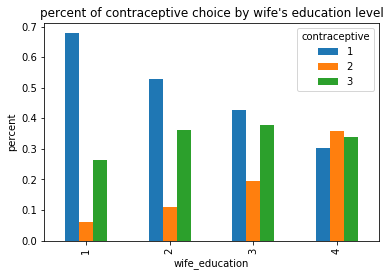

In [52]:
# Plot the percent of each contraceptive chosen by each wife given their education level.
# As we can tell from the graph, there is a decreasing percent of contraceptive method 1
# as education increases. Also, with education level = 4, three contraceptive methods are
# most evenly distributed.
wife_education_contra_percent = wife_education_contra.div(np.sum(wife_education_contra, axis = 1), axis = 0)
ax = wife_education_contra_percent.plot(kind = 'bar')
ax.set_ylabel("percent")
ax.set_title("percent of contraceptive choice by wife's education level");

Text(0.5, 1.0, "percent of wife's education level by choice of contraceptive method")

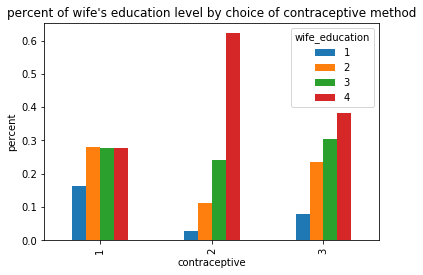

In [53]:
# Plot the percent of education level of the wife by the choice of contraceptive.
# As we can tell from the graph, in the population that chose contraceptiive 2,
# the majority is with education level 4. Similar distribution can also be observed in
# contraceptive 3 but educatoin level 4 is less dominating.
wife_contra_education = wife_education_contra.T
wife_contra_education_percent = wife_contra_education.div(np.sum(wife_contra_education, axis = 1), axis = 0)
ax = wife_contra_education_percent.plot(kind = 'bar')
ax.set_ylabel("percent")
ax.set_title("percent of wife's education level by choice of contraceptive method")

In [54]:
# compute the pivot table for the contraceptive method and the husband's education.
husband_education_contra = data.pivot_table(values = 'wife_age', index = 'husband_education', columns = 'contraceptive', aggfunc = 'count')
husband_education_contra

contraceptive,1,2,3
husband_education,,,
1,31,10,3
2,99,16,63
3,161,50,141
4,338,257,304


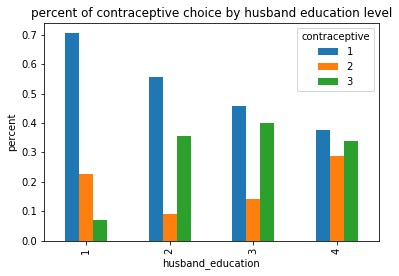

In [55]:
# Plot the percent of each contraceptive chosen by each husband given their education level.
# As we can tell from the graph, there is a decreasing percent of contraceptive method 1
# as education increases. Also, with education level = 4, three contraceptive methods are
# most evenly distributed. Interestingly, this plot is very similar to the above plot 
# regarding the wife's education

husband_education_contra_percent = husband_education_contra.div(np.sum(husband_education_contra, axis = 1), axis = 0)
ax = husband_education_contra_percent.plot(kind = 'bar')
ax.set_ylabel('percent')
ax.set_title("percent of contraceptive choice by husband education level");

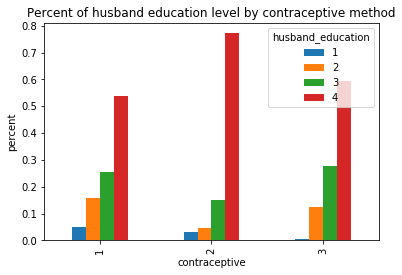

In [56]:
# Plot the percent of education level of the husband by the choice of contraceptive.
# As we can tell from the graph, in the population that chose contraceptiive 2,
# the majority is with education level 4. Similar distribution can also be observed in
# contraceptive 1 and 3 but educatoin level 4 is less dominating in those cases.
husband_contra_education = husband_education_contra.T
husband_contra_education_percent = husband_contra_education.div(np.sum(husband_contra_education, axis = 1), axis = 0)
ax = husband_contra_education_percent.plot(kind = 'bar')
ax.set_ylabel("percent")
ax.set_title('Percent of husband education level by contraceptive method');

In [57]:
# Table for the percent of each contraceptive chosen given the number of children.
num_child_contra = data.pivot_table(values = 'wife_age', index = 'num_child', columns = 'contraceptive', aggfunc = 'count', fill_value = 0)
num_child_contra_percent = num_child_contra.div(np.sum(num_child_contra, axis = 1), axis = 0)
num_child_contra_percent

contraceptive,1,2,3
num_child,,,
0,0.979381,0.000000,0.020619
1,0.518116,0.166667,0.315217
2,0.413043,0.202899,0.384058
3,0.270270,0.270270,0.459459
4,0.289340,0.314721,0.395939
5,0.325926,0.266667,0.407407
6,0.380435,0.293478,0.326087
7,0.367347,0.387755,0.244898
8,0.617021,0.191489,0.191489


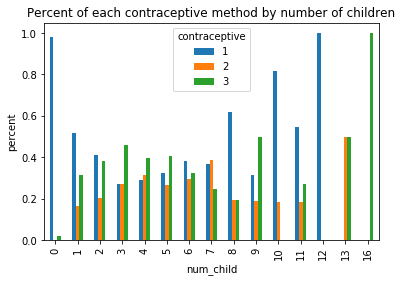

In [58]:
# plot the distribution(percent) of contraceptive given the number of children. 
# Observe that the proportion of contraceptive method 1 is dominating in most cases
ax = num_child_contra_percent.plot(kind = 'bar');
ax.set_ylabel("percent");
ax.set_title('Percent of each contraceptive method by number of children');

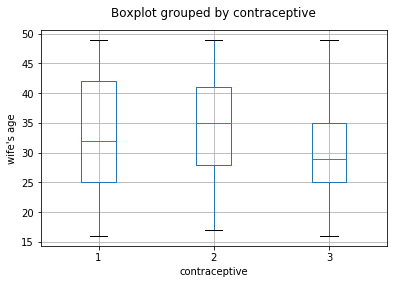

In [59]:
# plot boxplot for wife's age in each contraceptive method
ax = data.boxplot(column = 'wife_age', by = 'contraceptive')
ax.set_title("")
ax.set_ylabel("wife's age");

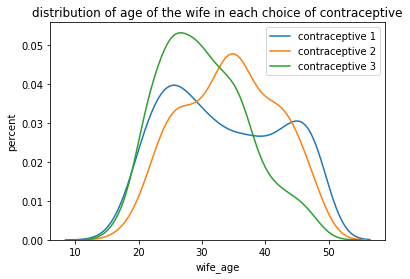

In [60]:
# distribution of the age of the wife given contraceptive method chosen
contraceptive_choice = [1, 2, 3]
for c in contraceptive_choice:
    ax = sns.distplot(data[data['contraceptive'] == c]['wife_age'], hist = False, label = "contraceptive {choice}".format(choice = c))
ax.set_ylabel('percent')
ax.set_title('distribution of age of the wife in each choice of contraceptive');

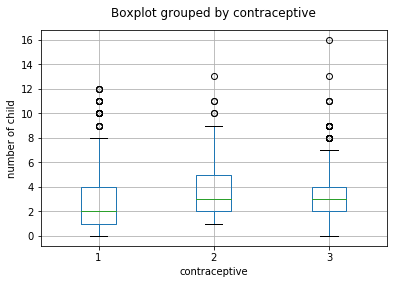

In [61]:
# plot the boxplot of number of child in each contraceptive method
ax = data.boxplot(column = 'num_child', by = 'contraceptive')
ax.set_title("")
ax.set_ylabel("number of child");

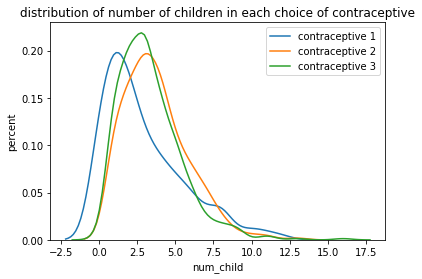

In [62]:
# distribution of number of children given contraceptive method chosen
contraceptive_choice = [1, 2, 3]
for c in contraceptive_choice:
    ax = sns.distplot(data[data['contraceptive'] == c]['num_child'], hist = False, label = "contraceptive {choice}".format(choice = c))
ax.set_ylabel('percent')
ax.set_title('distribution of number of children in each choice of contraceptive');

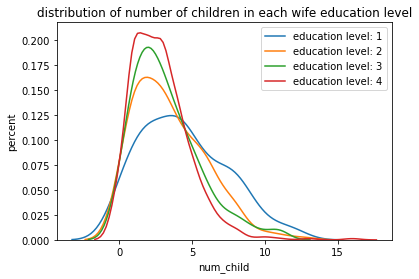

In [63]:
# distribution of number of children given the wife's education level
education_level = [1, 2, 3, 4]
for c in education_level:
    ax = sns.distplot(data[data['wife_education'] == c]['num_child'], hist = False, label = "education level: {choice}".format(choice = c))
ax.set_ylabel('percent')
ax.set_title('distribution of number of children in each wife education level');

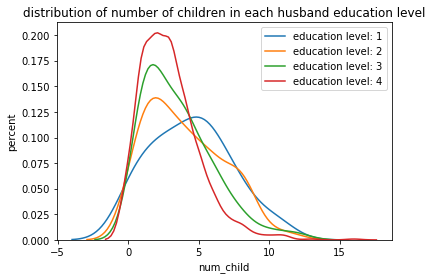

In [64]:
# distribution of number of children given the husband's education level
education_level = [1, 2, 3, 4]
for c in education_level:
    ax = sns.distplot(data[data['husband_education'] == c]['num_child'], hist = False, label = "education level: {choice}".format(choice = c))
ax.set_ylabel('percent')
ax.set_title('distribution of number of children in each husband education level');

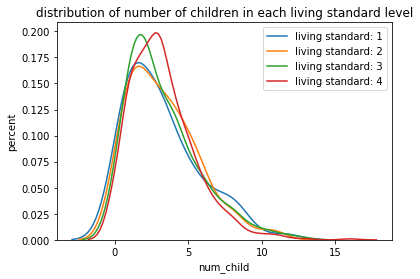

In [65]:
# distribution of number of children given the livin standard
living_standard= [1,2,3,4]
for c in living_standard:
    ax = sns.distplot(data[data['standard_living'] == c]['num_child'], hist = False, label = "living standard: {choice}".format(choice = c))
ax.set_ylabel('percent')
ax.set_title('distribution of number of children in each living standard level');

In [66]:
# some analysis about rank (using pca) of the augmented (addede one-hot encoding) dataset
# remove features used to generate one-hot features to avoid dependency
data = data.drop(labels = ['wife_education', 'husband_education', 'wife_religion', 'wife_work', 'husband_occupation', 'standard_living', 'media_exposure'], axis = 1)
# write the cleaned data to disk for classifying stage
data.to_csv('contra_cleaned.csv', index=False)
# try to standardize the input and store as another csv
data_std = (data - np.mean(data)) / np.std(data)
data_std.to_csv('contra_standardized.csv', index = False)

In [67]:
def plot_pc(col_names, vt, k):
    plt.bar(col_names, vt[k, :], alpha=0.7)
    plt.xticks(col_names, rotation=90);

In [68]:
# center the input data
data_centered = data - np.mean(data)
u, s, vt = np.linalg.svd(data_centered, full_matrices = False)

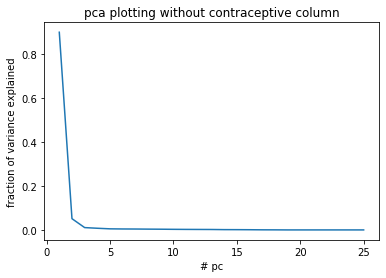

In [69]:
# plot the variance
plt.plot(np.arange(1, len(s) + 1), s ** 2 / np.sum(s**2))
plt.xlabel('# pc');
plt.ylabel('fraction of variance explained');
plt.title('pca plotting without contraceptive column');

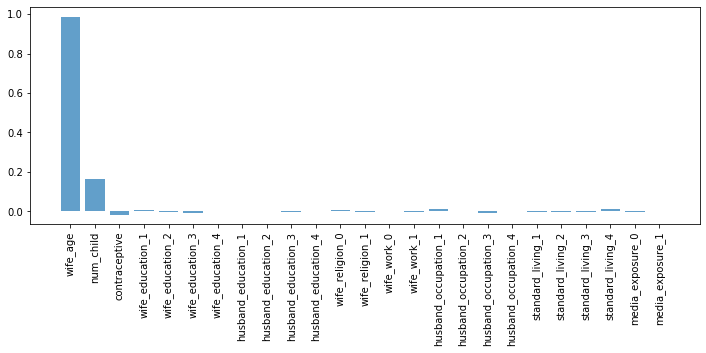

In [70]:
# Similar to what we did in Hw8, we plot the value of entries in the most
# dominating principal component and found that the wife's age
# and the number of child have the greatest value.
data_col_names = data.columns
with plt.rc_context({"figure.figsize": (12, 4)}):
    ax = plot_pc(data_col_names, vt, 0);

# Analysis & Prediction

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
# ignore the warning you might get from importing ensemble from sklearn
from sklearn import ensemble
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
from sklearn.metrics import mean_squared_error

## Read in the cleaned data (one-hot encoded) or standardized cleaned data

In [72]:
# reload the cleaned data
data = pd.read_csv("./contra_cleaned.csv")
data

,wife_age,num_child,contraceptive,wife_education_1,wife_education_2,wife_education_3,wife_education_4,husband_education_1,husband_education_2,husband_education_3,...,husband_occupation_1,husband_occupation_2,husband_occupation_3,husband_occupation_4,standard_living_1,standard_living_2,standard_living_3,standard_living_4,media_exposure_0,media_exposure_1
0,24,3,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,45,10,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,43,7,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,42,9,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,36,8,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,33,2,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1469,33,3,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1470,39,8,3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1471,33,4,3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Classification analysis on contraceptive method

In [73]:
# train test split for contraceptive method prediction
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.15, random_state=42)
X_train = train.drop(labels = 'contraceptive', axis = 1)
y_train = train[['contraceptive']].to_numpy().ravel()
X_test = test.drop(labels = 'contraceptive', axis = 1)
y_test = test[['contraceptive']].to_numpy().ravel()

### Subset selection from classification's logistic regression

In [74]:
# multiclass logistic regression and accuracy
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'lbfgs', max_iter = 1000,multi_class="auto")
model.fit(X_train, y_train)

train_acc = sum(model.predict(X_train) == y_train) / X_train.shape[0]
test_acc = sum(model.predict(X_test) == y_test) / X_test.shape[0]
print("training accuracy: "+ str(train_acc),"testing accuracy: "+ str(test_acc))

training accuracy: 0.5151757188498403 testing accuracy: 0.5565610859728507


In [75]:
# Logistic Regression feature selection

# We use the SelectFromModel package from sklearn to select the most predictive features of the input data
# Then below we match column values of the transformed training X with the original training X and 
# find the corresponding features names.
# There are multiple feature selection called in the following cells, and they all follow the same concept mentioned.

model1 = SelectFromModel(model, prefit=True)
X_new = model1.transform(X_train)
X_new.shape, X_train.shape
X_new[:10], X_train[:10]
# Best features: wife_education_1, wife_education_2, wife_education_4, husband_education_1, husband_education_3, 
# husband_occupation_4,standard_living_1,standard_living_4

(array([[0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 1., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 1.]]),
       wife_age  num_child  wife_education_1  wife_education_2  \
 479         44          4               0.0               0.0   
 275         35          1               0.0               0.0   
 1058        30          7               1.0               0.0   
 601         37          3               0.0               0.0   
 948         32          4               0.0               0.0   
 1230        32          4               0.0               0.0   
 1110        34          9               0.0               1.0   
 889      

In [76]:
# try a random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
rf = RandomForestClassifier(max_depth = 2, n_estimators = 5000, random_state=0)
rf.fit(X_train, y_train)
train_acc = sum(rf.predict(X_train) == y_train) / X_train.shape[0]
test_acc = sum(rf.predict(X_test) == y_test) / X_test.shape[0]
print("training accuracy: "+ str(train_acc),"testing accuracy: "+ str(test_acc))

training accuracy: 0.46884984025559107 testing accuracy: 0.5113122171945701


In [77]:
# Random forest feature selection
model1 = SelectFromModel(rf, prefit=True)
X_new = model1.transform(X_train)
X_new[:10], X_train[:10]
# Best features: wife_age, num_child, wife_education_1,wife_education_4,husband_occupation_1,standard_living_4,media_exposure_0

(array([[44.,  4.,  0.,  1.,  0.,  0.,  1.],
        [35.,  1.,  0.,  0.,  0.,  0.,  1.],
        [30.,  7.,  1.,  0.,  0.,  0.,  1.],
        [37.,  3.,  0.,  1.,  0.,  1.,  1.],
        [32.,  4.,  0.,  0.,  0.,  0.,  1.],
        [32.,  4.,  0.,  1.,  1.,  0.,  1.],
        [34.,  9.,  0.,  0.,  0.,  0.,  1.],
        [33.,  4.,  0.,  1.,  0.,  0.,  1.],
        [24.,  2.,  0.,  0.,  0.,  0.,  1.],
        [45.,  3.,  0.,  1.,  0.,  1.,  1.]]),
       wife_age  num_child  wife_education_1  wife_education_2  \
 479         44          4               0.0               0.0   
 275         35          1               0.0               0.0   
 1058        30          7               1.0               0.0   
 601         37          3               0.0               0.0   
 948         32          4               0.0               0.0   
 1230        32          4               0.0               0.0   
 1110        34          9               0.0               1.0   
 889         33     

In [78]:
# Single decision tree and accuracy
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)
train_acc = sum(dt.predict(X_train) == y_train) / X_train.shape[0]
test_acc = sum(dt.predict(X_test) == y_test) / X_test.shape[0]
print("training accuracy: "+ str(train_acc),"testing accuracy: "+ str(test_acc))

training accuracy: 0.9568690095846646 testing accuracy: 0.5429864253393665


In [79]:
# Decision Tree feature selection
model1 = SelectFromModel(dt, prefit=True)
X_new = model1.transform(X_train)
X_new[:10], X_train[:10]
# Best features: wife_age, num_child, wife_education_4, standard_living_4

(array([[44.,  4.,  1.],
        [35.,  1.,  0.],
        [30.,  7.,  0.],
        [37.,  3.,  1.],
        [32.,  4.,  0.],
        [32.,  4.,  1.],
        [34.,  9.,  0.],
        [33.,  4.,  1.],
        [24.,  2.,  0.],
        [45.,  3.,  1.]]),
       wife_age  num_child  wife_education_1  wife_education_2  \
 479         44          4               0.0               0.0   
 275         35          1               0.0               0.0   
 1058        30          7               1.0               0.0   
 601         37          3               0.0               0.0   
 948         32          4               0.0               0.0   
 1230        32          4               0.0               0.0   
 1110        34          9               0.0               1.0   
 889         33          4               0.0               0.0   
 754         24          2               0.0               1.0   
 602         45          3               0.0               0.0   
 
       wife_educatio

In [80]:
# adaptive boost method and accuracy plot
from sklearn.ensemble import AdaBoostClassifier
adaclf = AdaBoostClassifier(base_estimator = tree.DecisionTreeClassifier(max_depth = 10), n_estimators=1000, random_state=0)
adaclf.fit(X_train, y_train)
train_acc = sum(adaclf.predict(X_train) == y_train) / X_train.shape[0]
test_acc = sum(adaclf.predict(X_test) == y_test) / X_test.shape[0]
print("training accuracy: "+ str(train_acc),"testing accuracy: "+ str(test_acc))

training accuracy: 0.9536741214057508 testing accuracy: 0.5475113122171946


In [81]:
# neural net and accuracy
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(hidden_layer_sizes =[20] * 30, activation = 'tanh', max_iter = 1000)
nn.fit(X_train, y_train)
nn_train_accuracy = np.sum(nn.predict(X_train) == y_train) / X_train.shape[0]
nn_test_accuracy = np.sum(nn.predict(X_test) == y_test) / X_test.shape[0]
print("training accuracy: "+ str(nn_train_accuracy),"testing accuracy: "+ str(nn_test_accuracy))

training accuracy: 0.41613418530351437 testing accuracy: 0.48868778280542985


The highest test accuracy occurs at k = 21
The highest test accuracy is 0.6380090497737556


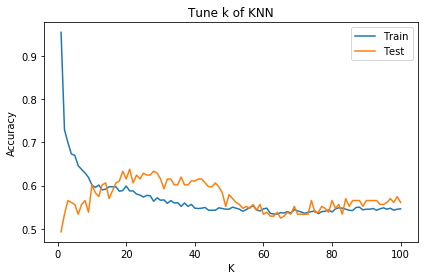

In [82]:
# Tune number k of nearest neighbor and accuracy plot
nn_train_accu = []
nn_test_accu = []
for k in range(1, 101):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    neigh_train_accuracy = np.sum(neigh.predict(X_train) == y_train) / X_train.shape[0]
    neigh_test_accuracy = np.sum(neigh.predict(X_test) == y_test) / X_test.shape[0]
    nn_train_accu.append(neigh_train_accuracy)
    nn_test_accu.append(neigh_test_accuracy)
    
plt.figure()
plt.title("Tune k of KNN" )
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.plot(range(1, 101), nn_train_accu, label="Train")
plt.plot(range(1, 101), nn_test_accu, label="Test")
plt.legend()
plt.tight_layout()
print("The highest test accuracy occurs at k =",np.argmax(nn_test_accu)+1)
print("The highest test accuracy is",np.max(nn_test_accu))



The highest test accuracy occurs at k = 0.01
The highest test accuracy is 0.6153846153846154


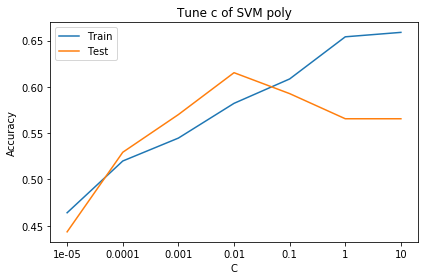

In [83]:
# SVM Poly kernel and accuracy plot 
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
svm_poly_train_accu = []
svm_poly_test_accu = []
for c in [1e-5,1e-4,1e-3,1e-2,1e-1,1,10]:
    svm_poly = SVC(gamma = 'auto',kernel = 'poly', C = c)
    svm_poly.fit(X_train, y_train)
    neigh_train_accuracy = np.sum(svm_poly.predict(X_train) == y_train) / X_train.shape[0]
    neigh_test_accuracy = np.sum(svm_poly.predict(X_test) == y_test) / X_test.shape[0]
    svm_poly_train_accu.append(neigh_train_accuracy)
    svm_poly_test_accu.append(neigh_test_accuracy)
plt.figure()
plt.title("Tune c of SVM poly" )
plt.xlabel("C")
plt.ylabel("Accuracy")
c_range = [1e-5,1e-4,1e-3,1e-2,1e-1,1,10]
xi = list(range(len(c_range)))
plt.plot(xi, svm_poly_train_accu, label="Train")
plt.plot(xi, svm_poly_test_accu, label="Test")
plt.legend()
plt.tight_layout()
plt.xticks(xi, c_range)
print("The highest test accuracy occurs at k =",c_range[np.argmax(svm_poly_test_accu)])
print("The highest test accuracy is",np.max(svm_poly_test_accu))

The highest test accuracy occurs at c = 1
The highest test accuracy is 0.6063348416289592


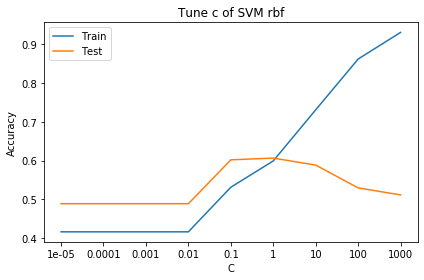

In [84]:
# SVM rbf kernel and accuracy plot
svm_rbf_train_accu = []
svm_rbf_test_accu = []
for c in [1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000]:
    clf = SVC(gamma = 'auto',kernel = 'rbf', C = c)
    clf.fit(X_train, y_train)
    neigh_train_accuracy = np.sum(clf.predict(X_train) == y_train) / X_train.shape[0]
    neigh_test_accuracy = np.sum(clf.predict(X_test) == y_test) / X_test.shape[0]
    svm_rbf_train_accu.append(neigh_train_accuracy)
    svm_rbf_test_accu.append(neigh_test_accuracy)
plt.figure()
plt.title("Tune c of SVM rbf" )
plt.xlabel("C")
plt.ylabel("Accuracy")
c_range =[1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000]
xi = list(range(len(c_range)))
plt.plot(xi, svm_rbf_train_accu, label="Train")
plt.plot(xi, svm_rbf_test_accu, label="Test")
plt.legend()
plt.tight_layout()
plt.xticks(xi, c_range)
print("The highest test accuracy occurs at c =",c_range[np.argmax(svm_rbf_test_accu)])
print("The highest test accuracy is",np.max(svm_rbf_test_accu))

The highest test accuracy occurs at c = 1e-05
The highest test accuracy is 0.48868778280542985


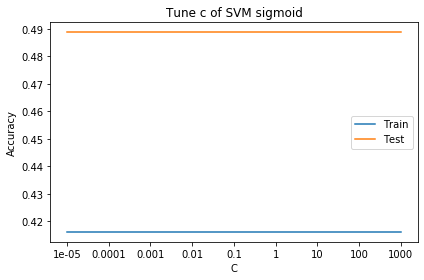

In [85]:
# SVM sigmoid kernel and accuracy plot
svm_sigmoid_train_accu = []
svm_sigmoid_test_accu = []
for c in [1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000]:
    clf = SVC(gamma = 'auto',kernel = 'sigmoid', C = c)
    clf.fit(X_train, y_train)
    neigh_train_accuracy = np.sum(clf.predict(X_train) == y_train) / X_train.shape[0]
    neigh_test_accuracy = np.sum(clf.predict(X_test) == y_test) / X_test.shape[0]
    svm_sigmoid_train_accu.append(neigh_train_accuracy)
    svm_sigmoid_test_accu.append(neigh_test_accuracy)

plt.figure()
plt.title("Tune c of SVM sigmoid" )
plt.xlabel("C")
plt.ylabel("Accuracy")
c_range =[1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000]
xi = list(range(len(c_range)))
plt.plot(xi, svm_sigmoid_train_accu, label="Train")
plt.plot(xi, svm_sigmoid_test_accu, label="Test")
plt.legend()
plt.tight_layout()
plt.xticks(xi, c_range)
print("The highest test accuracy occurs at c =",c_range[np.argmax(svm_sigmoid_test_accu)])
print("The highest test accuracy is",np.max(svm_sigmoid_test_accu))

## Regression analysis on num_child

In [86]:
# train test split for num_child prediction
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.15, random_state=42)
X_train = train.drop(labels = 'num_child', axis = 1)
y_train = train[['num_child']].to_numpy().ravel()
X_test = test.drop(labels = 'num_child', axis = 1)
y_test = test[['num_child']].to_numpy().ravel()

The lowest test mse occurs at k = 38
The lowest test mse is 2.8868778280542986


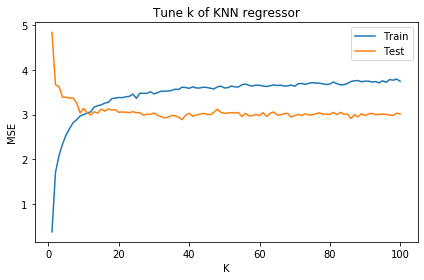

In [87]:
# Tuning k nearest neighbor regressor and accuracy plot
train_mse = []
test_mse = []

for k in range(1, 101):
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X_train, y_train)
    training_mse = mean_squared_error(np.round(neigh.predict(X_train)), y_train)
    testing_mse = mean_squared_error(np.round(neigh.predict(X_test)), y_test)
    train_mse.append(training_mse)
    test_mse.append(testing_mse)

plt.figure()
plt.title("Tune k of KNN regressor" )
plt.xlabel("K")
plt.ylabel("MSE")
plt.plot(range(1, 101), train_mse, label="Train")
plt.plot(range(1, 101), test_mse, label="Test")
plt.legend()
plt.tight_layout()
print("The lowest test mse occurs at k =",np.argmin(test_mse)+1)
print("The lowest test mse is",np.min(test_mse))

The lowest test mse occurs at alpha = 1e-05
The lowest test mse is 3.004524886877828


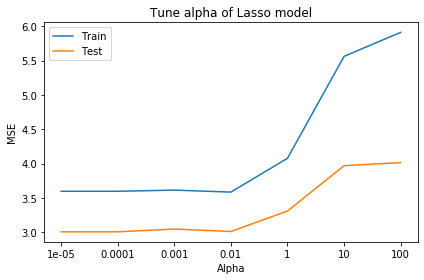

In [88]:
# Tuning lasso model and mse plot
train_mse = []
test_mse = []
c = [0.00001, 0.0001, 0.001, 0.01, 1, 10,100]
xi = list(range(len(c)))
for alpha in c:
    lasso = linear_model.Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    training_mse = mean_squared_error(np.round(lasso.predict(X_train)), y_train)
    testing_mse = mean_squared_error(np.round(lasso.predict(X_test)), y_test)
    train_mse.append(training_mse)
    test_mse.append(testing_mse)

plt.figure()
plt.title("Tune alpha of Lasso model" )
plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.plot(xi, train_mse, label="Train")
plt.plot(xi, test_mse, label="Test")
plt.legend()
plt.tight_layout()
plt.xticks(xi, c)
print("The lowest test mse occurs at alpha =", c[np.argmin(test_mse)])
print("The lowest test mse is",np.min(test_mse))

In [89]:
# feature selection using lasso model
lasso = linear_model.Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
model = SelectFromModel(lasso, prefit=True)
X_new = model.transform(X_train)
X_new[:10], X_train[:10]
# Best features: wife_age, contraceptive, wife_education_2, wife_education_4, husband_education_2, husband_education_4,

(array([[44.,  2.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.],
        [35.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.],
        [30.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.],
        [37.,  2.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  1.],
        [32.,  3.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.],
        [32.,  2.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.],
        [34.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.],
        [33.,  3.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.],
        [24.,  3.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.],
        [45.,  2.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  1.]]),
       wife_age  contraceptive  wife_education_1  wife_education_2  \
 479         44              2               0.0               0.0   
 275         35              1               0.0               0.0   
 1058        30              1               1.0               0.0   
 601         37   

The lowest test mse occurs at c = 1
The lowest test mse is 2.6470588235294117


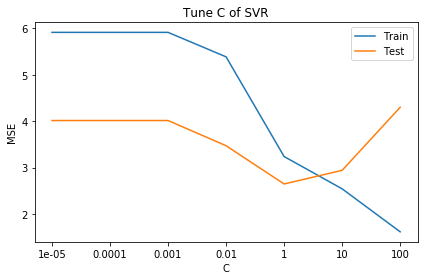

In [90]:
# Tuning SVR model and mse plot
train_mse = []
test_mse = []
c = [0.00001, 0.0001, 0.001, 0.01, 1, 10,100]
xi = list(range(len(c)))
for C in c:
    svr = SVR(C=C, epsilon=0.1, gamma = "auto")
    svr.fit(X_train, y_train)
    training_mse = mean_squared_error(np.round(svr.predict(X_train)), y_train)
    testing_mse = mean_squared_error(np.round(svr.predict(X_test)), y_test)
    train_mse.append(training_mse)
    test_mse.append(testing_mse)

plt.figure()
plt.title("Tune C of SVR" )
plt.xlabel("C")
plt.ylabel("MSE")
plt.plot(xi, train_mse, label="Train")
plt.plot(xi, test_mse, label="Test")
plt.legend()
plt.tight_layout()
plt.xticks(xi, c)
print("The lowest test mse occurs at c =",c[np.argmin(test_mse)])
print("The lowest test mse is",np.min(test_mse))

The lowest test mse occurs at alpha = 100
The lowest test mse is 2.8868778280542986


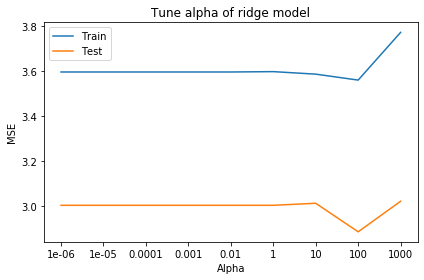

In [91]:
# Tuning ridge regression model and mse plot
train_mse = []
test_mse = []
c = [0.000001 ,0.00001, 0.0001, 0.001, 0.01, 1, 10,100,1000]
xi = list(range(len(c)))
for alpha in c:
    ridge_model = linear_model.Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    training_mse = mean_squared_error(np.round(ridge_model.predict(X_train)), y_train)
    testing_mse = mean_squared_error(np.round(ridge_model.predict(X_test)), y_test)
    train_mse.append(training_mse)
    test_mse.append(testing_mse)

plt.figure()
plt.title("Tune alpha of ridge model" )
plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.plot(xi, train_mse, label="Train")
plt.plot(xi, test_mse, label="Test")
plt.legend()
plt.tight_layout()
plt.xticks(xi, c)
print("The lowest test mse occurs at alpha =", c[np.argmin(test_mse)])
print("The lowest test mse is",np.min(test_mse))

In [92]:
# feature selection using lasso model
ridge_model = linear_model.Ridge(alpha=100)
ridge_model.fit(X_train, y_train)
model = SelectFromModel(ridge_model, prefit=True)
X_new = model.transform(X_train)
X_new[:10], X_train[:10]
# Best features: wife_age, contraceptive, wife_education_2, wife_education_4

(array([[44.,  2.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.],
        [35.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.],
        [30.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.],
        [37.,  2.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.],
        [32.,  3.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.],
        [32.,  2.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.],
        [34.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  0.],
        [33.,  3.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.],
        [24.,  3.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.],
        [45.,  2.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.]]),
       wife_age  contraceptive  wife_education_1  wife_education_2  \
 479         44              2               0.0               0.0   
 275         35              1               0.0               0.0   
 1058        30              1               1.0               0.0   
 601         37              2               0.0               0.0   
 948         32              3               0.0